In [2]:
# ========== 1. KÜTÜPHANELER ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

print("✅ Kütüphaneler yüklendi")
print(f"Pandas versiyon: {pd.__version__}")
print(f"Çalışma zamanı: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Kütüphaneler yüklendi
Pandas versiyon: 3.0.0
Çalışma zamanı: 2026-02-05 18:19:30


In [3]:
# ========== 2. VERİ YÜKLEME ==========
print("\n" + "="*60)
print("📂 VERİ YÜKLEME")
print("="*60)

# Dosya yolunu ayarla
file_path = "D:/Software/Python/IMDBVeriAnalizi/title.basics.tsv.gz"

# Dosyanın var olup olmadığını kontrol et
if not os.path.exists(file_path):
    print(f"❌ HATA: Dosya bulunamadı: {file_path}")
    print("Lütfen dosya yolunu kontrol edin.")
else:
    file_size = os.path.getsize(file_path)
    print(f"📦 Dosya boyutu: {file_size / (1024**3):.2f} GB")

    # Veriyi yükle
    try:
        df = pd.read_csv(
            file_path,
            compression='gzip',
            sep='\t',
            low_memory=False,
            dtype={'tconst': str, 'primaryTitle': str, 'originalTitle': str}
        )
        print(f"✅ Veri başarıyla yüklendi!")
        print(f"📊 Veri boyutu: {df.shape[0]:,} satır, {df.shape[1]} sütun")
    except Exception as e:
        print(f"❌ Yükleme hatası: {e}")
        exit()


📂 VERİ YÜKLEME
📦 Dosya boyutu: 0.20 GB
✅ Veri başarıyla yüklendi!
📊 Veri boyutu: 12,265,715 satır, 9 sütun


In [4]:
# ========== 3. İLK İNCELEME ==========
print("\n" + "="*60)
print("🔍 İLK İNCELEME")
print("="*60)

# İlk 5 satır
print("\n📄 İlk 5 kayıt:")
print(df.head())

# DataFrame bilgileri
print("\n📋 DataFrame Bilgileri:")
print(f"Satır sayısı: {df.shape[0]:,}")
print(f"Sütun sayısı: {df.shape[1]}")
print("\nSütun isimleri:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Veri tipleri
print("\n📝 Veri Tipleri:")
print(df.dtypes)


🔍 İLK İNCELEME

📄 İlk 5 kayıt:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              5  Animation,Comedy,Romance  
3        0      1892      \N             12           Animation,Short  
4        0      1893      \N              1                     Short  

📋 DataFrame Bilgileri:
Satır sayısı: 12,265,715
Sütun sayısı: 9

Sütun isimleri:
   1. tco

In [5]:
# ========== 4. VERİ TEMİZLEME ==========
print("\n" + "="*60)
print("🧹 VERİ TEMİZLEME")
print("="*60)

# 4.1 '\\N' değerlerini NaN'a çevir (IMDb özel durumu)
print("\n1. '\\N' değerlerini NaN'a çeviriyorum...")
df = df.replace('\\N', np.nan)

# 4.2 Sayısal sütunları dönüştür
print("2. Sayısal sütunları dönüştürüyorum...")
numeric_columns = ['startYear', 'endYear', 'runtimeMinutes', 'isAdult']
converted_count = 0

for col in numeric_columns:
    if col in df.columns:
        before_type = df[col].dtype
        df[col] = pd.to_numeric(df[col], errors='coerce')
        after_type = df[col].dtype
        converted_count += 1
        print(f"   ✓ {col}: {before_type} → {after_type}")

print(f"   Toplam {converted_count} sütun dönüştürüldü")

# 4.3 Eksik değer analizi
print("\n3. Eksik değer analizi:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Eksik_Adet': missing_values,
    'Eksik_Yüzde': missing_percentage
}).sort_values('Eksik_Adet', ascending=False)

# Sadece eksik değeri olan sütunları göster
missing_df = missing_df[missing_df['Eksik_Adet'] > 0]

if len(missing_df) > 0:
    print(f"\n{'Sütun':<20} {'Eksik Adet':<15} {'Yüzde':<10}")
    print("-" * 50)
    for idx, row in missing_df.iterrows():
        print(f"{idx:<20} {row['Eksik_Adet']:<15,} {row['Eksik_Yüzde']:.1f}%")
else:
    print("   ✓ Hiç eksik değer yok!")



🧹 VERİ TEMİZLEME

1. '\N' değerlerini NaN'a çeviriyorum...
2. Sayısal sütunları dönüştürüyorum...
   ✓ startYear: str → float64
   ✓ endYear: str → float64
   ✓ runtimeMinutes: str → float64
   ✓ isAdult: int64 → int64
   Toplam 4 sütun dönüştürüldü

3. Eksik değer analizi:

Sütun                Eksik Adet      Yüzde     
--------------------------------------------------
endYear              12,112,987.0    98.8%
runtimeMinutes       7,871,743.0     64.2%
startYear            1,452,933.0     11.8%
genres               532,417.0       4.3%
originalTitle        25.0            0.0%
primaryTitle         25.0            0.0%


In [6]:
# ========== 5. YIL ARALIĞI DÜZELTMESİ ==========
print("\n" + "="*60)
print("📅 YIL ARALIĞI DÜZELTMESİ")
print("="*60)

if 'startYear' in df.columns:
    # Orijinal durum
    original_min = df['startYear'].min()
    original_max = df['startYear'].max()
    original_count = len(df)

    print(f"ORJİNAL DURUM:")
    print(f"  • Yıl aralığı: {original_min:.0f} - {original_max:.0f}")
    print(f"  • Kayıt sayısı: {original_count:,}")

    # Hatalı tarihleri göster
    current_year = 2026
    future_records = df[df['startYear'] > current_year]
    ancient_records = df[df['startYear'] < 1880]

    if len(future_records) > 0:
        print(f"  ⚠️  Gelecek tarihli kayıt: {len(future_records):,} (en geç: {future_records['startYear'].max():.0f})")

    if len(ancient_records) > 0:
        print(f"  ⚠️  Çok eski kayıt: {len(ancient_records):,} (en eski: {ancient_records['startYear'].min():.0f})")

    # Filtreleme
    print("\n🔧 FİLTRELEME YAPILIYOR...")
    min_year = 1880  # Sinemanın başlangıcı
    max_year = current_year + 2  # Gelecek 2 yılı da içerebilir

    # Mantıklı tarihleri filtrele
    mask = (df['startYear'] >= min_year) & (df['startYear'] <= max_year)
    df = df[mask].copy()

    # Sonuçları göster
    filtered_min = df['startYear'].min()
    filtered_max = df['startYear'].max()
    filtered_count = len(df)
    removed_count = original_count - filtered_count

    print(f"\n✅ DÜZELTİLMİŞ DURUM:")
    print(f"  • Yıl aralığı: {filtered_min:.0f} - {filtered_max:.0f}")
    print(f"  • Kayıt sayısı: {filtered_count:,}")
    print(f"  • Çıkarılan kayıt: {removed_count:,} (%{removed_count/original_count*100:.2f})")

else:
    print("❌ startYear sütunu bulunamadı!")


📅 YIL ARALIĞI DÜZELTMESİ
ORJİNAL DURUM:
  • Yıl aralığı: 1874 - 2115
  • Kayıt sayısı: 12,265,715
  ⚠️  Gelecek tarihli kayıt: 555 (en geç: 2115)
  ⚠️  Çok eski kayıt: 32 (en eski: 1874)

🔧 FİLTRELEME YAPILIYOR...

✅ DÜZELTİLMİŞ DURUM:
  • Yıl aralığı: 1881 - 2028
  • Kayıt sayısı: 10,812,726
  • Çıkarılan kayıt: 1,452,989 (%11.85)



📈 TEMEL ANALİZLER

1. İÇERİK TÜRLERİ DAĞILIMI:
Tür                       Adet            Yüzde     
--------------------------------------------------
tvEpisode                 8,202,110       75.9%
short                     1,067,882       9.9%
movie                     626,777         5.8%
video                     319,474         3.0%
tvSeries                  269,761         2.5%
tvMovie                   149,544         1.4%
tvMiniSeries              63,447          0.6%
tvSpecial                 56,517          0.5%
videoGame                 46,367          0.4%
tvShort                   10,797          0.1%

Toplam 11 farklı içerik türü var


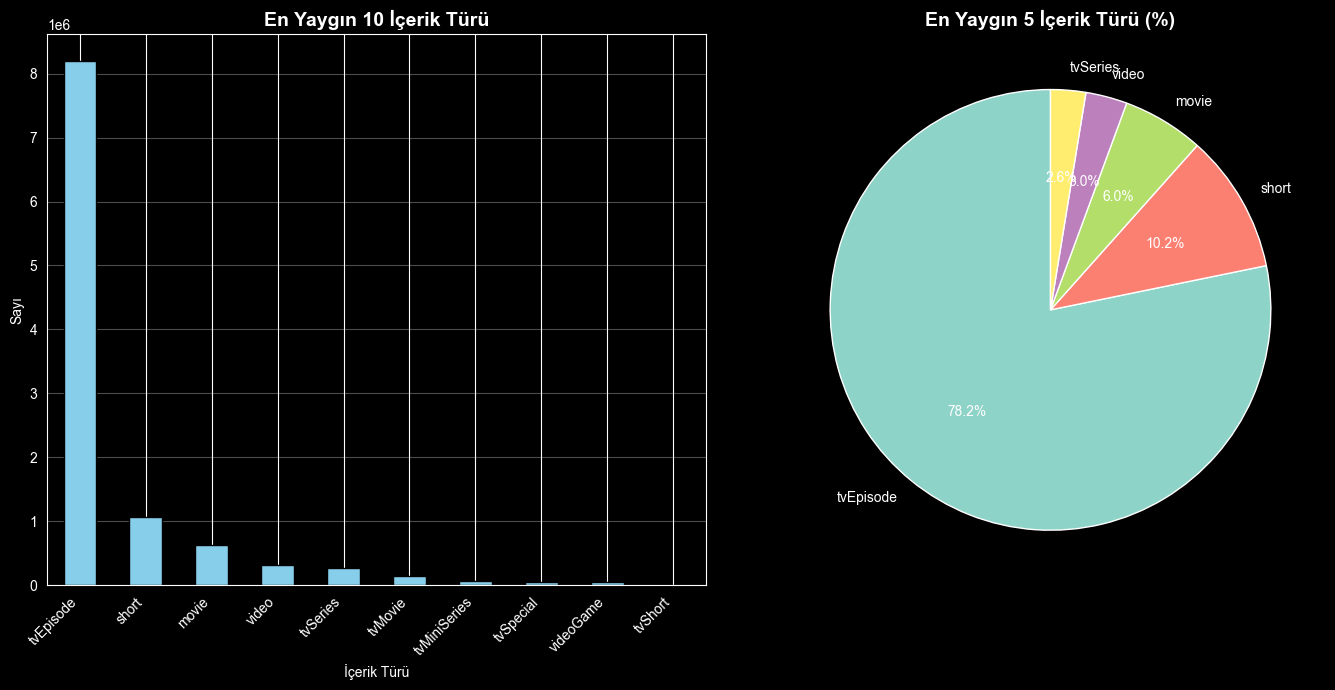


2. YILLARA GÖRE DAĞILIM:
En üretken yıl: 2021 (523,277 içerik)
En az üretken yıl: 1883 (1 içerik)

📅 Son 10 Yılın Verisi:
Yıl        İçerik Sayısı   Yıllık Artış   
----------------------------------------
2027       482             -              
2026       35,168          %+7196.3       
2025       365,918         %+940.5        
2024       446,165         %+21.9         
2023       480,234         %+7.6          
2022       510,555         %+6.3          
2021       523,277         %+2.5          
2020       447,380         %-14.5         
2019       465,956         %+4.2          
2018       468,615         %+0.6          


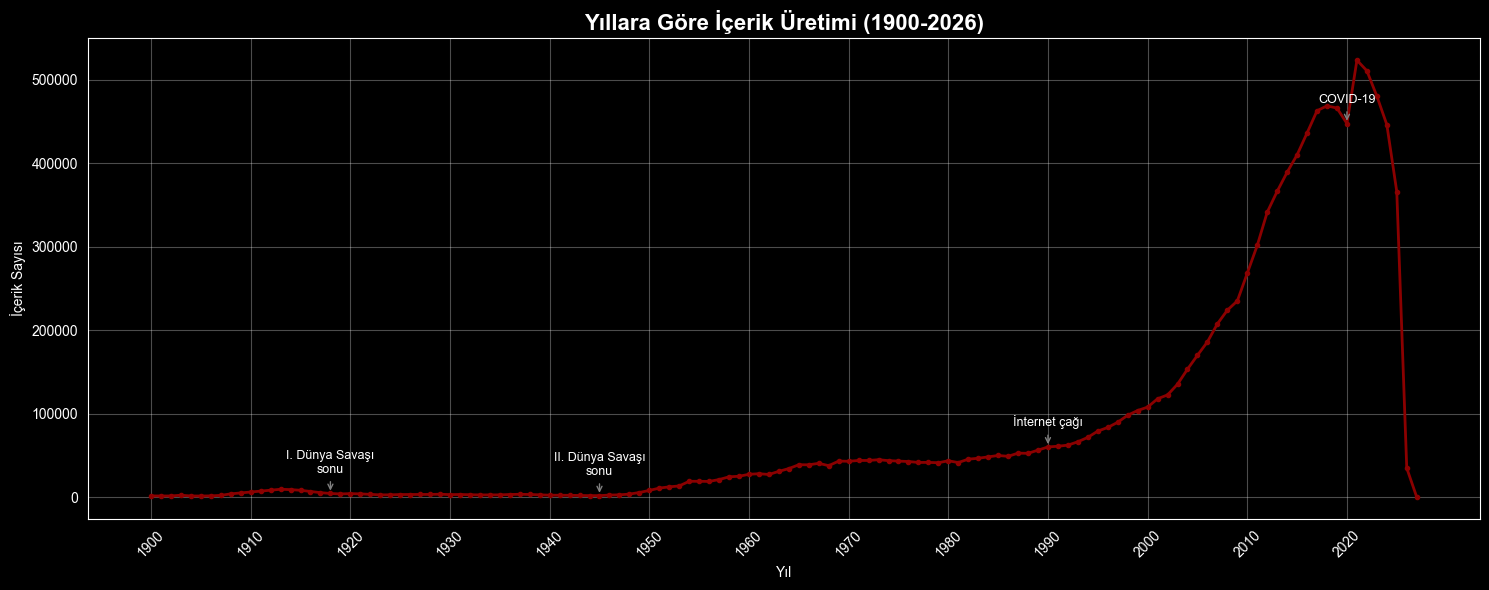


3. SÜRE (RUNTIME) ANALİZİ:
✓ Ortalama süre: 43.1 dakika
✓ Medyan süre: 30.0 dakika
✓ Standart sapma: 35.5 dakika
✓ En kısa: 1.0 dakika
✓ En uzun: 240.0 dakika

⏱️  Süre Kategorileri:
Kategori             Film Sayısı     Yüzde     
--------------------------------------------------
Çok Kısa (<30)       1,732,185       41.9%
Kısa (30-60)         1,318,768       31.9%
Orta (60-90)         601,108         14.5%
Uzun (90-120)        298,465         7.2%
Çok Uzun (120-180)   135,778         3.3%
Epik (>180)          40,771          1.0%


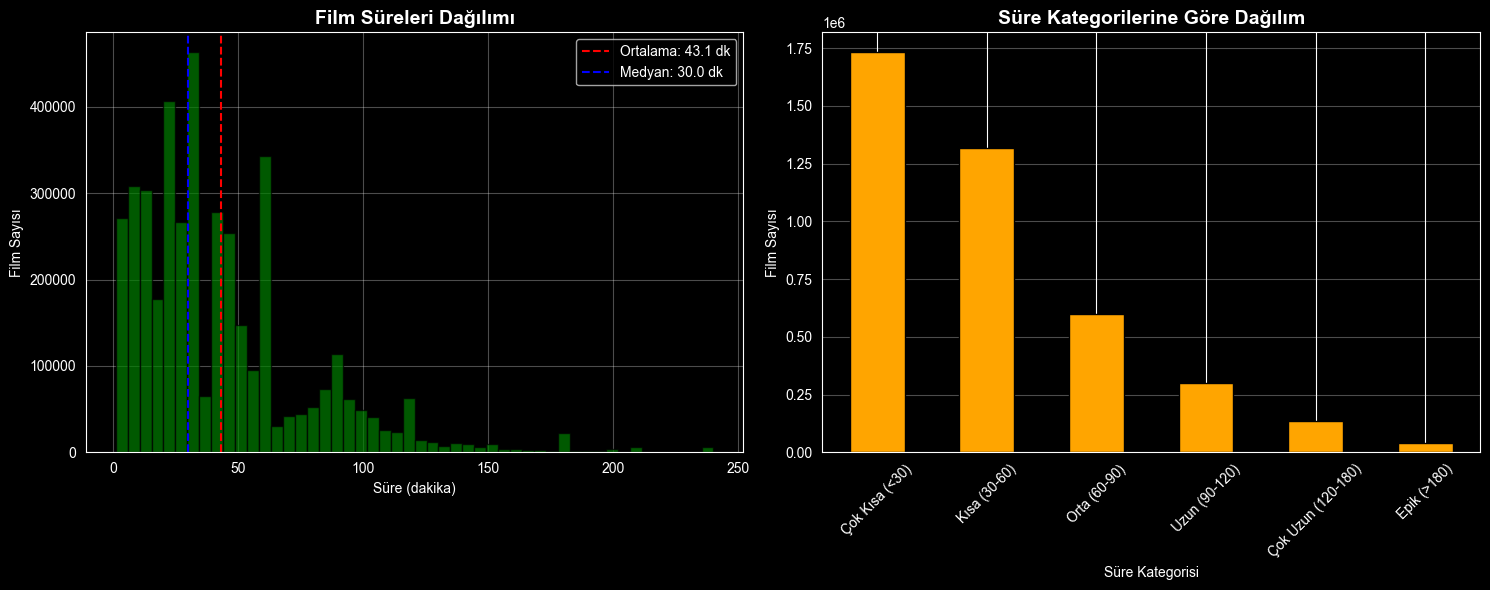


4. TÜR (GENRE) ANALİZİ:
Toplam 28 farklı tür bulundu
Toplam 868,048 tür ataması yapılmış

🏆 En Popüler 15 Tür:
Tür                  Film Sayısı     Yüzde     
--------------------------------------------------
 1. Drama              235,378         37.6%
 2. Documentary        135,012         21.5%
 3. Comedy             107,262         17.1%
 4. Action             48,709          7.8%
 5. Romance            48,416          7.7%
 6. Crime              37,203          5.9%
 7. Thriller           36,780          5.9%
 8. Horror             33,021          5.3%
 9. Adventure          26,279          4.2%
10. Family             17,555          2.8%
11. Mystery            17,201          2.7%
12. Biography          16,531          2.6%
13. History            14,507          2.3%
14. Music              14,329          2.3%
15. Fantasy            14,162          2.3%

🎭 En Popüler Tür Kombinasyonları:
 1. Drama                                    114,417 film
 2. Documentary                  

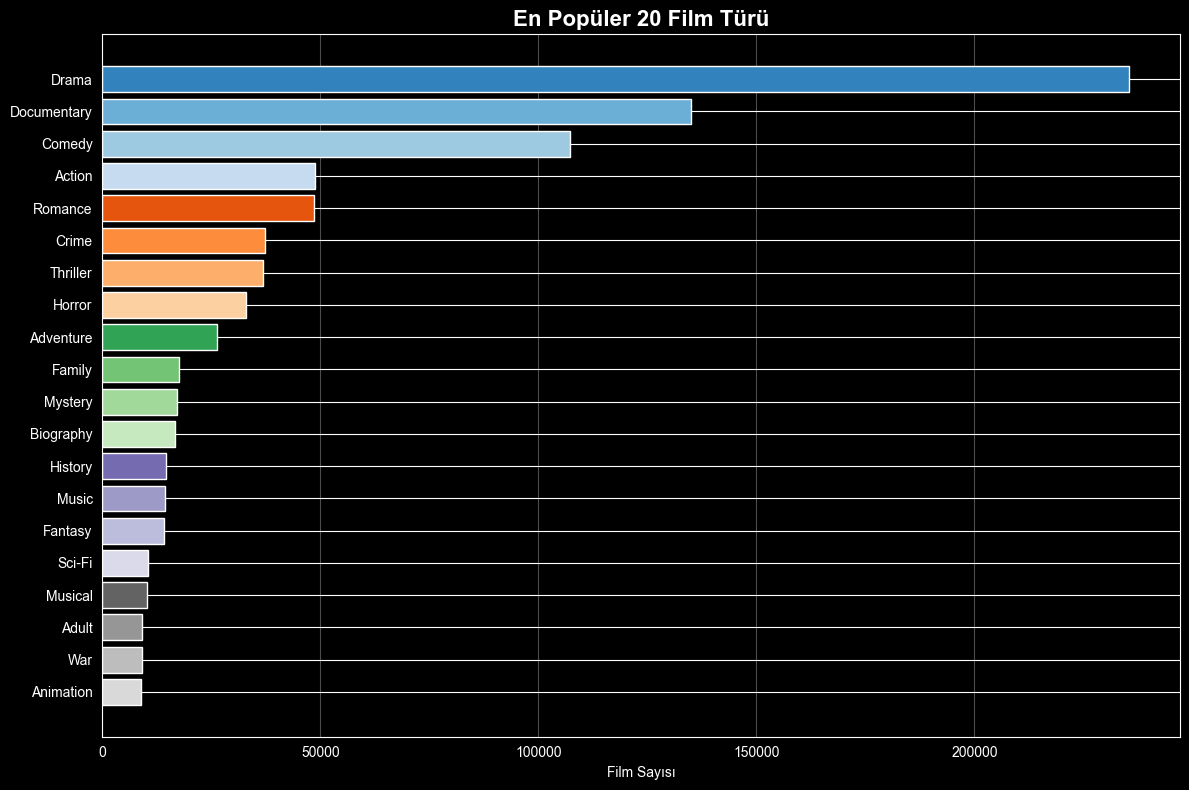


5. BAŞLIK UZUNLUĞU ANALİZİ:
⚠️  20 adet boş başlık (NaN) tespit edildi
✓ Ortalama başlık uzunluğu: 20.6 karakter
✓ Medyan başlık uzunluğu: 15.0 karakter
✓ En kısa başlık: 0 karakter
✓ En uzun başlık: 482 karakter

📝 Başlık Uzunluğu Kategorileri:
  • Çok Kısa (0-10): 944,760 başlık (%8.7)
  • Kısa (10-20): 5,747,350 başlık (%53.2)
  • Orta-Kısa (20-30): 2,303,994 başlık (%21.3)
  • Orta (30-40): 979,543 başlık (%9.1)
  • Orta-Uzun (40-50): 380,359 başlık (%3.5)
  • Uzun (50-100): 436,745 başlık (%4.0)
  • Çok Uzun (100+): 19,926 başlık (%0.2)

🔍 En Uzun 5 Başlık:
  1. HALT-075: A New Graduate Office Lady in Pantyhose Kneels Down and Apologizes for Her Boss's Mista... (482 karakter)
  2. ERIC Voter Roll System and George Soros/J6 Footage Proves Set Up by Feds/Wisconsin Locked Into ER... (458 karakter)
  3. Is There Evidence Algorithm Was on Voting Machines of Several Companies?/Shocking Video of Senato... (431 karakter)
  4. Otoko wa chi _ ko de handan suru hentai tsuma!!!->[Ten'nen yur

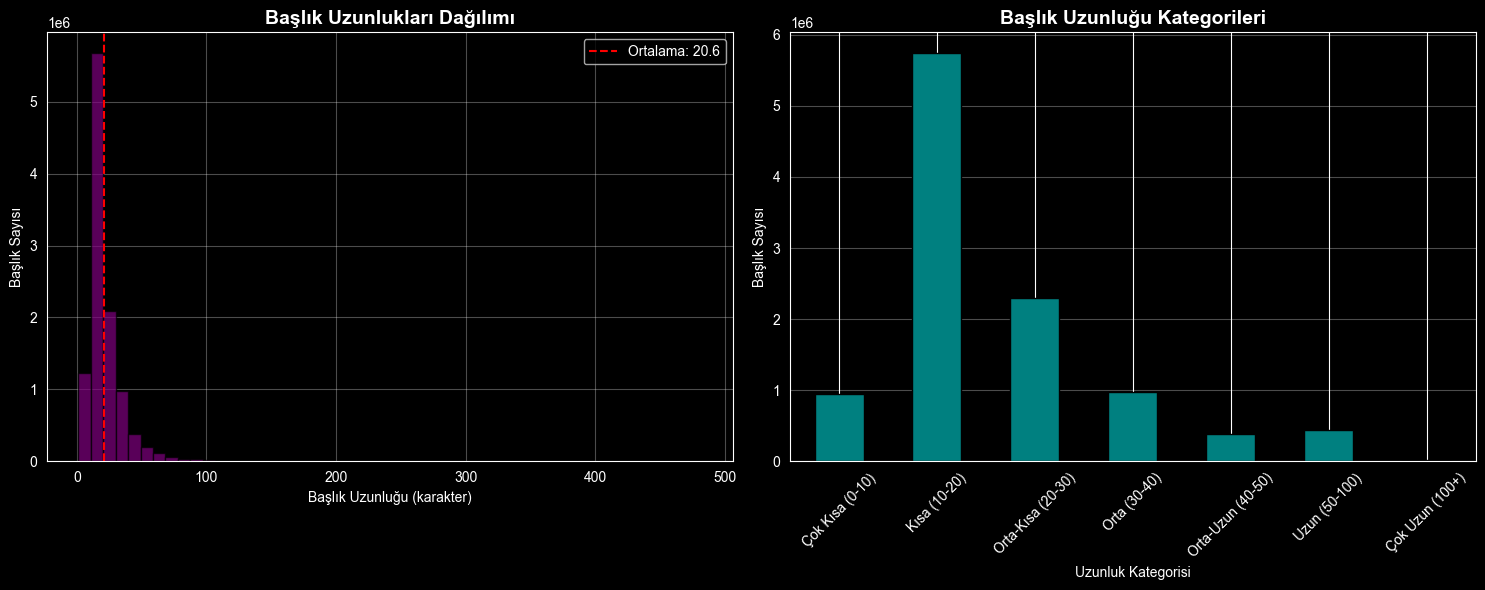

In [8]:
# ========== 6. TEMEL ANALİZLER ==========
print("\n" + "="*60)
print("📈 TEMEL ANALİZLER")
print("="*60)

# 6.1 titleType dağılımı
print("\n1. İÇERİK TÜRLERİ DAĞILIMI:")
if 'titleType' in df.columns:
    title_counts = df['titleType'].value_counts()

    print(f"{'Tür':<25} {'Adet':<15} {'Yüzde':<10}")
    print("-" * 50)

    total = len(df)
    for ttype, count in title_counts.head(10).items():
        percentage = (count / total) * 100
        print(f"{ttype:<25} {count:<15,} {percentage:.1f}%")

    print(f"\nToplam {len(title_counts)} farklı içerik türü var")

    # Görselleştirme
    plt.figure(figsize=(14, 7))

    # Bar plot
    plt.subplot(1, 2, 1)
    title_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('En Yaygın 10 İçerik Türü', fontsize=14, fontweight='bold')
    plt.xlabel('İçerik Türü')
    plt.ylabel('Sayı')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Pie chart (sadece ilk 5)
    plt.subplot(1, 2, 2)
    top_5 = title_counts.head(5)
    colors = plt.cm.Set3(np.linspace(0, 1, 5))
    plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('En Yaygın 5 İçerik Türü (%)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# 6.2 Yıllara göre dağılım
print("\n2. YILLARA GÖRE DAĞILIM:")
if 'startYear' in df.columns:
    # Yıllık sayıları hesapla
    yearly_counts = df['startYear'].value_counts().sort_index()

    # İstatistikler
    print(f"En üretken yıl: {yearly_counts.idxmax():.0f} ({yearly_counts.max():,} içerik)")
    print(f"En az üretken yıl: {yearly_counts.idxmin():.0f} ({yearly_counts.min():,} içerik)")

    # Son 10 yılın verisi
    print("\n📅 Son 10 Yılın Verisi:")
    recent_years = sorted([y for y in df['startYear'].unique() if y >= 2016], reverse=True)

    print(f"{'Yıl':<10} {'İçerik Sayısı':<15} {'Yıllık Artış':<15}")
    print("-" * 40)

    prev_count = None
    for year in recent_years[:10]:
        count = yearly_counts[year]
        if prev_count is not None:
            change = ((count - prev_count) / prev_count) * 100
            change_str = f"%{change:+.1f}"
        else:
            change_str = "-"

        print(f"{year:<10.0f} {count:<15,} {change_str:<15}")
        prev_count = count

    # Görselleştirme
    plt.figure(figsize=(15, 6))

    # 1900'den sonrası
    yearly_counts_1900 = yearly_counts[yearly_counts.index >= 1900]

    plt.plot(yearly_counts_1900.index, yearly_counts_1900.values,
             color='darkred', linewidth=2, marker='o', markersize=3)

    # Önemli yılları işaretle
    important_years = {
        1918: 'I. Dünya Savaşı\nsonu',
        1945: 'II. Dünya Savaşı\nsonu',
        1990: 'İnternet çağı',
        2020: 'COVID-19'
    }

    for year, label in important_years.items():
        if year in yearly_counts_1900.index:
            plt.annotate(label, xy=(year, yearly_counts_1900[year]),
                        xytext=(0, 15), textcoords='offset points',
                        ha='center', fontsize=9,
                        arrowprops=dict(arrowstyle='->', color='gray'))

    plt.title('Yıllara Göre İçerik Üretimi (1900-2026)', fontsize=16, fontweight='bold')
    plt.xlabel('Yıl')
    plt.ylabel('İçerik Sayısı')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1900, 2027, 10), rotation=45)
    plt.tight_layout()
    plt.show()

# 6.3 Süre (runtime) analizi
print("\n3. SÜRE (RUNTIME) ANALİZİ:")
if 'runtimeMinutes' in df.columns:
    # Mantıklı süre aralığı belirle (1 dakika - 4 saat)
    df_runtime = df[(df['runtimeMinutes'] >= 1) & (df['runtimeMinutes'] <= 240)]

    runtime_stats = df_runtime['runtimeMinutes'].describe()

    print(f"✓ Ortalama süre: {runtime_stats['mean']:.1f} dakika")
    print(f"✓ Medyan süre: {runtime_stats['50%']:.1f} dakika")
    print(f"✓ Standart sapma: {runtime_stats['std']:.1f} dakika")
    print(f"✓ En kısa: {runtime_stats['min']:.1f} dakika")
    print(f"✓ En uzun: {runtime_stats['max']:.1f} dakika")

    # Kategorilere ayır
    bins = [0, 30, 60, 90, 120, 180, 240]
    labels = ['Çok Kısa (<30)', 'Kısa (30-60)', 'Orta (60-90)',
              'Uzun (90-120)', 'Çok Uzun (120-180)', 'Epik (>180)']

    df_runtime['duration_category'] = pd.cut(df_runtime['runtimeMinutes'],
                                            bins=bins, labels=labels, right=False)

    category_counts = df_runtime['duration_category'].value_counts().sort_index()

    print("\n⏱️  Süre Kategorileri:")
    print(f"{'Kategori':<20} {'Film Sayısı':<15} {'Yüzde':<10}")
    print("-" * 50)

    total_runtime = len(df_runtime)
    for cat, count in category_counts.items():
        percentage = (count / total_runtime) * 100
        print(f"{cat:<20} {count:<15,} {percentage:.1f}%")

    # Görselleştirme
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Histogram
    axes[0].hist(df_runtime['runtimeMinutes'], bins=50,
                color='green', alpha=0.7, edgecolor='black')
    axes[0].axvline(runtime_stats['mean'], color='red', linestyle='--',
                   label=f'Ortalama: {runtime_stats["mean"]:.1f} dk')
    axes[0].axvline(runtime_stats['50%'], color='blue', linestyle='--',
                   label=f'Medyan: {runtime_stats["50%"]:.1f} dk')
    axes[0].set_title('Film Süreleri Dağılımı', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Süre (dakika)')
    axes[0].set_ylabel('Film Sayısı')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Kategori bar chart
    category_counts.plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
    axes[1].set_title('Süre Kategorilerine Göre Dağılım', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Süre Kategorisi')
    axes[1].set_ylabel('Film Sayısı')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# 6.4 Tür (genre) analizi
print("\n4. TÜR (GENRE) ANALİZİ:")
if 'genres' in df.columns:
    # Sadece filmleri al
    movies_df = df[df['titleType'] == 'movie'].copy() if 'titleType' in df.columns else df

    # Türleri ayır ve say
    all_genres = []
    for genres in movies_df['genres'].dropna():
        if isinstance(genres, str):
            all_genres.extend([g.strip() for g in genres.split(',')])

    genre_counts = pd.Series(all_genres).value_counts()

    print(f"Toplam {len(genre_counts)} farklı tür bulundu")
    print(f"Toplam {len(all_genres):,} tür ataması yapılmış")

    print("\n🏆 En Popüler 15 Tür:")
    print(f"{'Tür':<20} {'Film Sayısı':<15} {'Yüzde':<10}")
    print("-" * 50)

    for i, (genre, count) in enumerate(genre_counts.head(15).items(), 1):
        percentage = (count / len(movies_df)) * 100
        print(f"{i:2d}. {genre:<18} {count:<15,} {percentage:.1f}%")

    # En popüler tür kombinasyonları
    print("\n🎭 En Popüler Tür Kombinasyonları:")
    genre_combinations = movies_df['genres'].value_counts().head(10)

    for i, (combo, count) in enumerate(genre_combinations.items(), 1):
        print(f"{i:2d}. {combo:<40} {count:,} film")

    # Görselleştirme
    plt.figure(figsize=(12, 8))

    # Horizontal bar chart
    top_20_genres = genre_counts.head(20)
    y_pos = np.arange(len(top_20_genres))

    plt.barh(y_pos, top_20_genres.values, color=plt.cm.tab20c(np.linspace(0, 1, 20)))
    plt.yticks(y_pos, top_20_genres.index)
    plt.xlabel('Film Sayısı')
    plt.title('En Popüler 20 Film Türü', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # En yüksek en üstte
    plt.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

# 6.5 Başlık uzunluğu analizi (DÜZELTİLMİŞ)
print("\n5. BAŞLIK UZUNLUĞU ANALİZİ:")
if 'primaryTitle' in df.columns:
    # NaN değerleri kontrol et
    nan_count = df['primaryTitle'].isnull().sum()
    print(f"⚠️  {nan_count} adet boş başlık (NaN) tespit edildi")

    # NaN değerleri boş string ile doldur
    df['primaryTitle_clean'] = df['primaryTitle'].fillna('')

    # Uzunluk hesapla
    df['title_length'] = df['primaryTitle_clean'].str.len()

    # İstatistikler
    title_stats = df['title_length'].describe()

    print(f"✓ Ortalama başlık uzunluğu: {title_stats['mean']:.1f} karakter")
    print(f"✓ Medyan başlık uzunluğu: {title_stats['50%']:.1f} karakter")
    print(f"✓ En kısa başlık: {title_stats['min']:.0f} karakter")
    print(f"✓ En uzun başlık: {title_stats['max']:.0f} karakter")

    # Uzunluk kategorileri
    length_bins = [0, 10, 20, 30, 40, 50, 100, 500]
    length_labels = ['Çok Kısa (0-10)', 'Kısa (10-20)', 'Orta-Kısa (20-30)',
                    'Orta (30-40)', 'Orta-Uzun (40-50)', 'Uzun (50-100)',
                    'Çok Uzun (100+)']

    df['title_length_category'] = pd.cut(df['title_length'],
                                        bins=length_bins,
                                        labels=length_labels,
                                        right=False)

    length_counts = df['title_length_category'].value_counts().sort_index()

    print("\n📝 Başlık Uzunluğu Kategorileri:")
    for cat, count in length_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  • {cat}: {count:,} başlık (%{percentage:.1f})")

    # En uzun başlıklar
    print("\n🔍 En Uzun 5 Başlık:")
    longest_titles = df.nlargest(5, 'title_length')[['primaryTitle', 'title_length']]

    for i, (idx, row) in enumerate(longest_titles.iterrows(), 1):
        title = str(row['primaryTitle'])
        if len(title) > 100:
            display_title = title[:97] + "..."
        else:
            display_title = title

        print(f"  {i}. {display_title} ({row['title_length']} karakter)")

    # Görselleştirme
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Histogram
    axes[0].hist(df[df['title_length'] > 0]['title_length'], bins=50,
                color='purple', alpha=0.7, edgecolor='black')
    axes[0].axvline(title_stats['mean'], color='red', linestyle='--',
                   label=f'Ortalama: {title_stats["mean"]:.1f}')
    axes[0].set_title('Başlık Uzunlukları Dağılımı', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Başlık Uzunluğu (karakter)')
    axes[0].set_ylabel('Başlık Sayısı')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Kategori bar chart
    length_counts.plot(kind='bar', ax=axes[1], color='teal', edgecolor='black')
    axes[1].set_title('Başlık Uzunluğu Kategorileri', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Uzunluk Kategorisi')
    axes[1].set_ylabel('Başlık Sayısı')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()


🚀 İLERİ ANALİZLER

1. YILLARA GÖRE ORTALAMA FİLM SÜRESİ:
Son 50 yılda ortalama film süresi:
  • En kısa ortalama: 87.3 dk (2009)
  • En uzun ortalama: 97.5 dk (2019)
  • Güncel ortalama (2020-2026): 93.5 dk


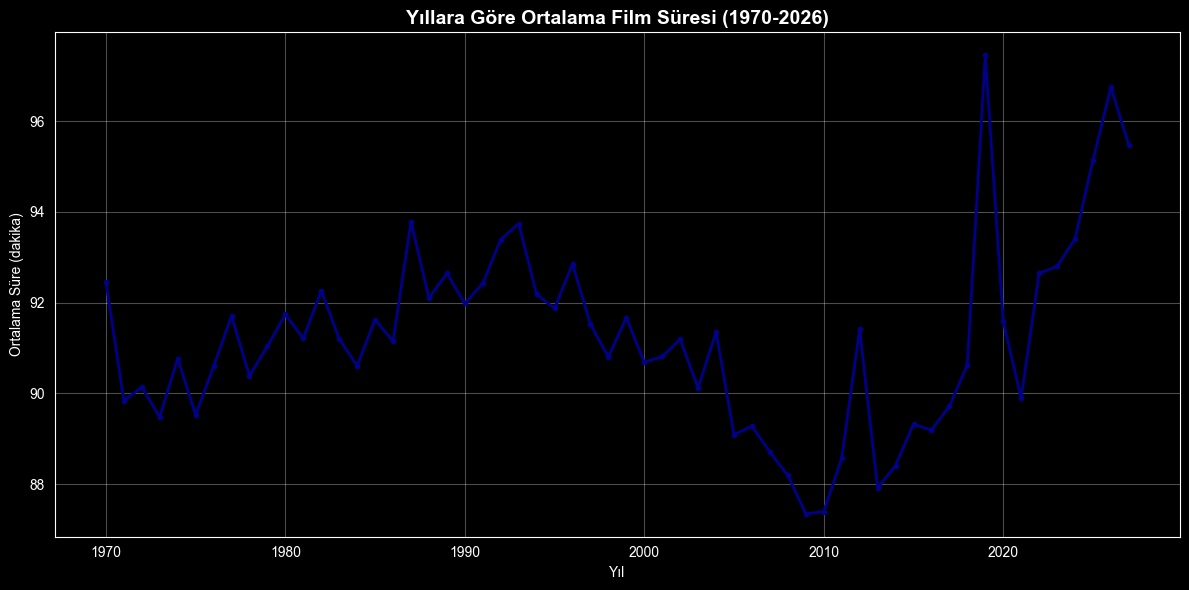


2. EN ÜRETKEN YILLAR:
🏆 En Çok İçerik Üretilen 10 Yıl:
Yıl        İçerik Sayısı  
------------------------------
 1. 2021     523,277        
 2. 2022     510,555        
 3. 2023     480,234        
 4. 2018     468,615        
 5. 2019     465,956        
 6. 2017     462,794        
 7. 2020     447,380        
 8. 2024     446,165        
 9. 2016     436,180        
10. 2015     410,071        


In [9]:
# ========== 7. İLERİ ANALİZLER ==========
print("\n" + "="*60)
print("🚀 İLERİ ANALİZLER")
print("="*60)

# 7.1 Yıllara göre ortalama süre
print("\n1. YILLARA GÖRE ORTALAMA FİLM SÜRESİ:")
if all(col in df.columns for col in ['startYear', 'runtimeMinutes']):
    # Sadece filmler ve geçerli süreleri al
    movies_with_runtime = df[(df['titleType'] == 'movie') &
                            (df['runtimeMinutes'].notna()) &
                            (df['runtimeMinutes'] > 0)].copy()

    # Yıllara göre grupla
    yearly_avg_runtime = movies_with_runtime.groupby('startYear')['runtimeMinutes'].mean()

    # Son 50 yıl
    recent_years_avg = yearly_avg_runtime[yearly_avg_runtime.index >= 1970]

    print(f"Son 50 yılda ortalama film süresi:")
    print(f"  • En kısa ortalama: {recent_years_avg.min():.1f} dk ({recent_years_avg.idxmin():.0f})")
    print(f"  • En uzun ortalama: {recent_years_avg.max():.1f} dk ({recent_years_avg.idxmax():.0f})")
    print(f"  • Güncel ortalama (2020-2026): {recent_years_avg[recent_years_avg.index >= 2020].mean():.1f} dk")

    # Görselleştirme
    plt.figure(figsize=(12, 6))
    plt.plot(recent_years_avg.index, recent_years_avg.values,
             color='darkblue', linewidth=2, marker='o', markersize=3)
    plt.title('Yıllara Göre Ortalama Film Süresi (1970-2026)', fontsize=14, fontweight='bold')
    plt.xlabel('Yıl')
    plt.ylabel('Ortalama Süre (dakika)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 7.2 En üretken yıllar
print("\n2. EN ÜRETKEN YILLAR:")
if 'startYear' in df.columns:
    yearly_counts = df['startYear'].value_counts().sort_values(ascending=False)

    print("🏆 En Çok İçerik Üretilen 10 Yıl:")
    print(f"{'Yıl':<10} {'İçerik Sayısı':<15}")
    print("-" * 30)

    for i, (year, count) in enumerate(yearly_counts.head(10).items(), 1):
        print(f"{i:2d}. {year:<8.0f} {count:<15,}")


In [10]:
# ========== 8. VERİ KAYDETME ==========
print("\n" + "="*60)
print("💾 VERİ KAYDETME")
print("="*60)

# Temizlenmiş veriyi kaydet
output_path = "D:/Software/Python/IMDBVeriAnalizi/imdb_cleaned.csv"
try:
    # Önemli sütunları seç
    columns_to_save = ['tconst', 'titleType', 'primaryTitle', 'startYear',
                      'runtimeMinutes', 'genres']

    # Sadece bu sütunlar varsa kaydet
    available_columns = [col for col in columns_to_save if col in df.columns]

    if available_columns:
        df[available_columns].to_csv(output_path, index=False, encoding='utf-8')
        print(f"✅ Temizlenmiş veri kaydedildi: {output_path}")
        print(f"📦 Kaydedilen sütunlar: {len(available_columns)}")
        print(f"📄 Kaydedilen kayıtlar: {len(df):,}")

        # Kaydedilen dosya boyutu
        if os.path.exists(output_path):
            saved_size = os.path.getsize(output_path)
            print(f"💿 Kaydedilen dosya boyutu: {saved_size / (1024**2):.2f} MB")
    else:
        print("❌ Kaydedilecek sütun bulunamadı!")

except Exception as e:
    print(f"❌ Kaydetme hatası: {e}")



💾 VERİ KAYDETME
✅ Temizlenmiş veri kaydedildi: D:/Software/Python/IMDBVeriAnalizi/imdb_cleaned.csv
📦 Kaydedilen sütunlar: 6
📄 Kaydedilen kayıtlar: 10,812,677
💿 Kaydedilen dosya boyutu: 669.54 MB


In [13]:
# ========== 9. ANALİZ ÖZETİ ==========
print("\n" + "="*60)
print("📊 ANALİZ ÖZETİ")
print("="*60)

print(f"\n🎬 GENEL İSTATİSTİKLER:")
print(f"  • Toplam kayıt: {df.shape[0]:,}")
print(f"  • Toplam sütun: {df.shape[1]}")
print(f"  • Yıl aralığı: {df['startYear'].min():.0f} - {df['startYear'].max():.0f}" if 'startYear' in df.columns else "")

print(f"\n🏆 ENLER:")
if 'titleType' in df.columns:
    top_type = df['titleType'].value_counts().index[0]
    top_count = df['titleType'].value_counts().iloc[0]
    print(f"  • En yaygın içerik türü: {top_type} ({top_count:,} adet)")

if 'runtimeMinutes' in df.columns:
    avg_runtime = df['runtimeMinutes'].mean()
    print(f"  • Ortalama süre: {avg_runtime:.1f} dakika")

print(f"\n📈 PROJE KAZANIMLARI VE GELİŞİM:")
print("   ✅ Veri yükleme ve temizleme aynı mantık")
print("   ✅ Eksik değer analizi benzer şekilde yapıldı")
print("   ✅ Görselleştirme teknikleri aynı")
print("   ✅ Filtreleme ve gruplama benzer")
print("   ⭐ YENİ: Büyük veri seti ile çalışma (GB boyutunda)")
print("   ⭐ YENİ: Web veri seti (IMDb) analizi")

print(f"\n🎯 SONRAKİ ADIM ÖNERİLERİ:")
print("   1. Diğer IMDb veri setleri ile birleştirme (rating, crew)")
print("   2. Metin analizi (başlıklarda en sık geçen kelimeler)")
print("   3. Türler arası ilişki analizi (hangi türler birlikte bulunuyor?)")
print("   4. Zaman serisi analizi (trendler, mevsimsellik)")

print(f"\n🕒 Çalışma tamamlandı: {datetime.now().strftime('%H:%M:%S')}")
print("="*60)


📊 ANALİZ ÖZETİ

🎬 GENEL İSTATİSTİKLER:
  • Toplam kayıt: 10,812,677
  • Toplam sütun: 12
  • Yıl aralığı: 1881 - 2027

🏆 ENLER:
  • En yaygın içerik türü: tvEpisode (8,202,110 adet)
  • Ortalama süre: 45.2 dakika

📈 PROJE KAZANIMLARI VE GELİŞİM:
   ✅ Veri yükleme ve temizleme aynı mantık
   ✅ Eksik değer analizi benzer şekilde yapıldı
   ✅ Görselleştirme teknikleri aynı
   ✅ Filtreleme ve gruplama benzer
   ⭐ YENİ: Büyük veri seti ile çalışma (GB boyutunda)
   ⭐ YENİ: Web veri seti (IMDb) analizi

🎯 SONRAKİ ADIM ÖNERİLERİ:
   1. Diğer IMDb veri setleri ile birleştirme (rating, crew)
   2. Metin analizi (başlıklarda en sık geçen kelimeler)
   3. Türler arası ilişki analizi (hangi türler birlikte bulunuyor?)
   4. Zaman serisi analizi (trendler, mevsimsellik)

🕒 Çalışma tamamlandı: 22:21:25
